# Exploration of San Francisco Data Set
In this exploration, we visulize some of the raw parameters and relationships amongst them. 

First, to explain what is in this dataset. Raw variables which are provided include: dates (timestamp), category of incident, description of incident, day of the week, police department district, resolution, address, and coordinates (latitude and longitude). Category, description, and resolution are only provided in the training data set. 

With this in mind, we just get a sense of the raw data:

In [3]:
#import all the packages for this notebook, create helper functions
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def ReadSFData(data_file):
    return pd.read_csv(data_file)

In [4]:
#import the data file and read it
tr_master = ReadSFData('train.csv')
# print tr_master.info()
test_data = ReadSFData('test.csv')
# print test_data.info()

There is both a temporal and spatial element to this data. We start with looking at the temporal aspect:

In [5]:
#crime over time, perhaps a series of histograms or barcharts
year = []
month = []
season = []
winter = ['12', '01', '02']
spring = ['03', '04', '05']
summer = ['06', '07', '08']
fall = ['09', '10', '11']
for date in tr_master['Dates']:
    year.append(date[0:4])
    month.append(date[5:7])
    if date[5:7] in winter:
        season.append(1)
    elif date[5:7] in summer:
        season.append(3)
    elif date[5:7] in fall:
        season.append(4)
    elif date[5:7] in spring:
        season.append(2)
tr_master['Years'] = year
tr_master['Month'] = month
tr_master['Season'] = season

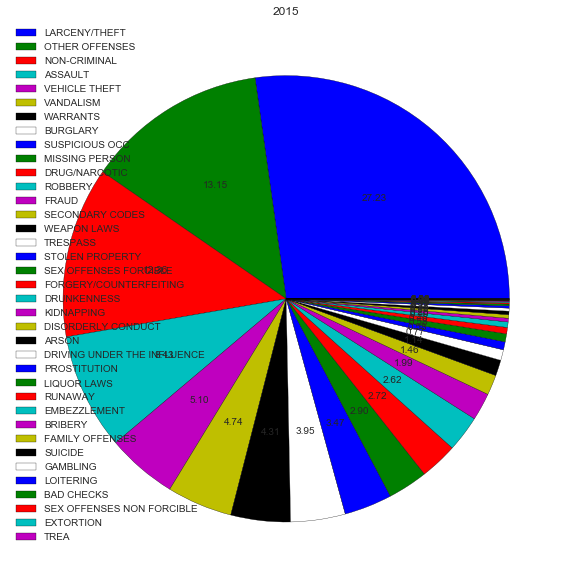

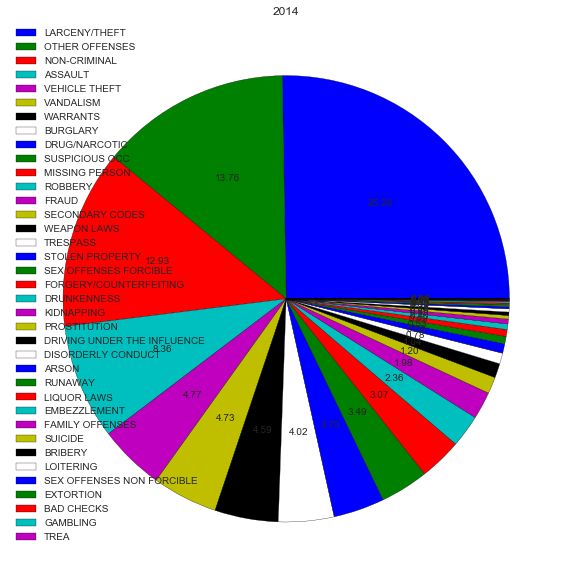

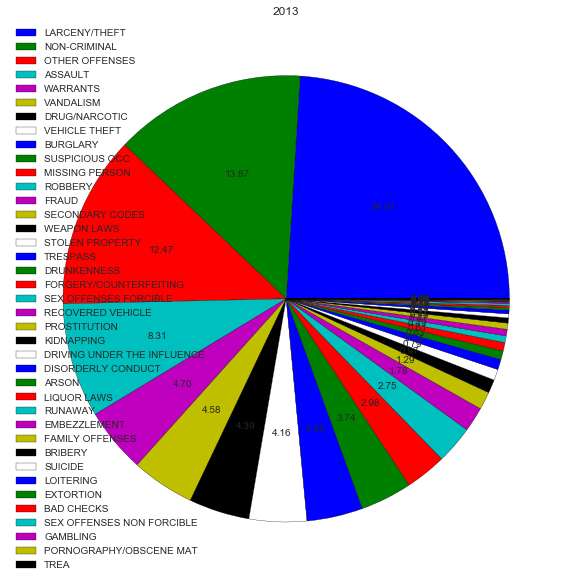

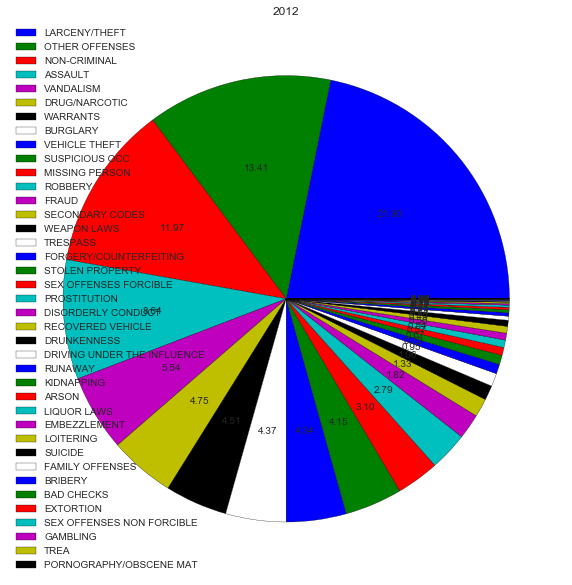

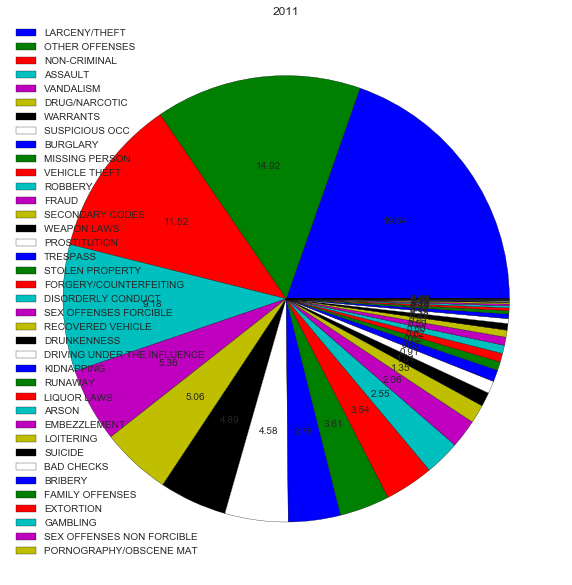

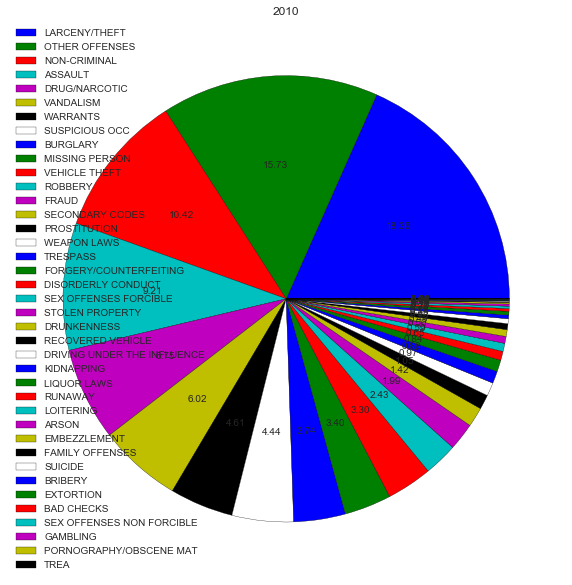

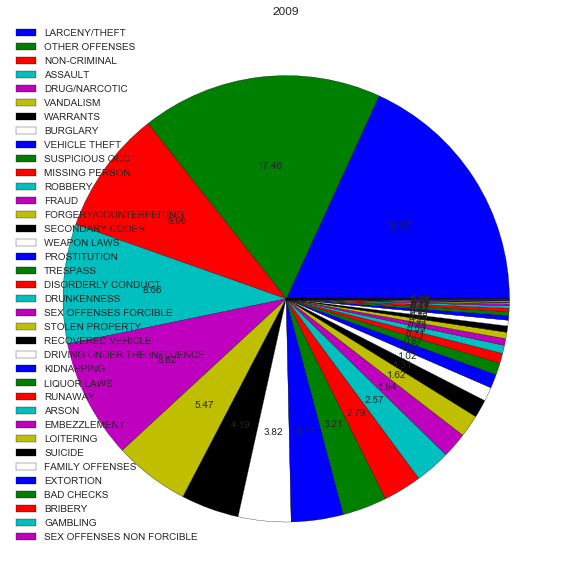

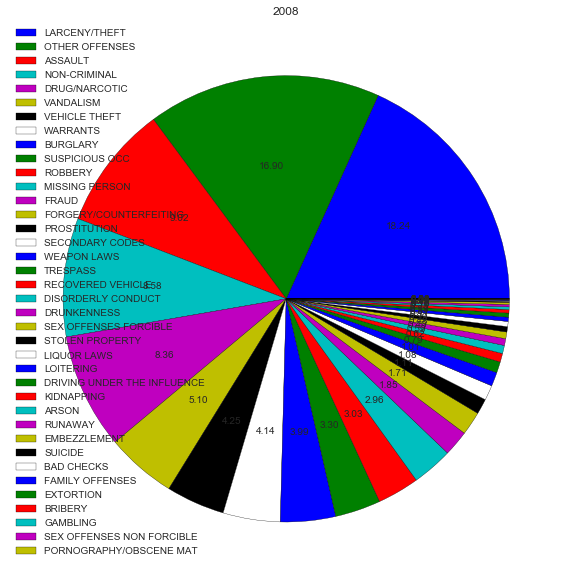

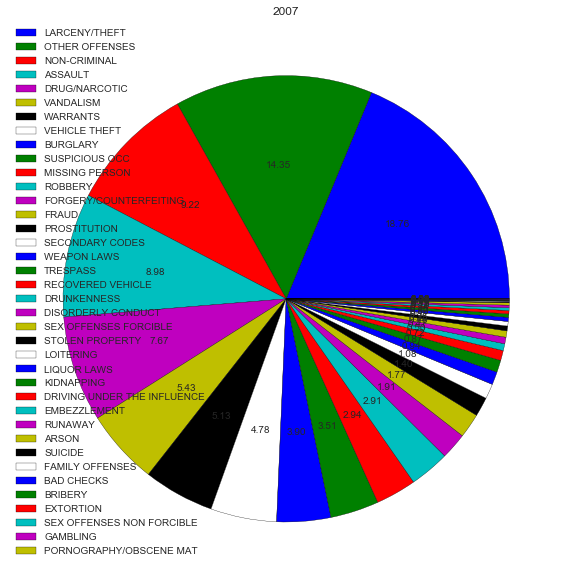

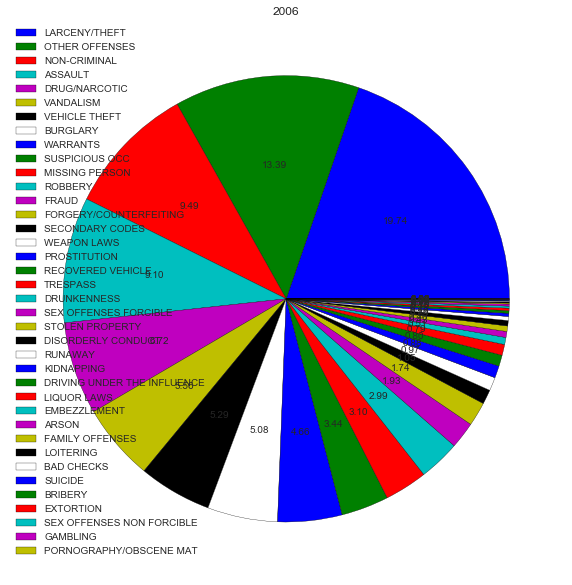

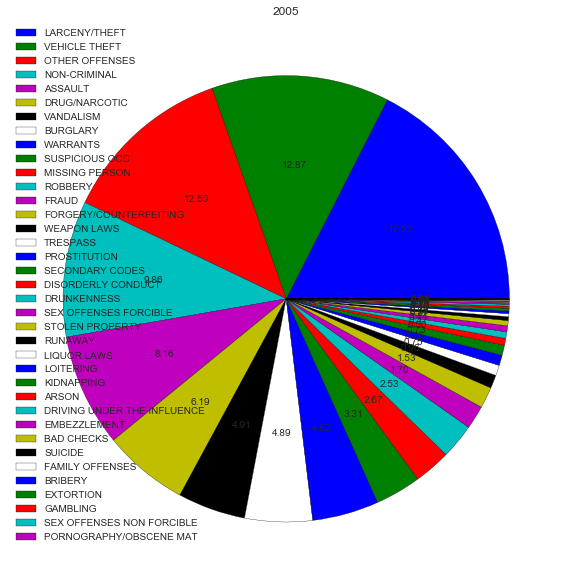

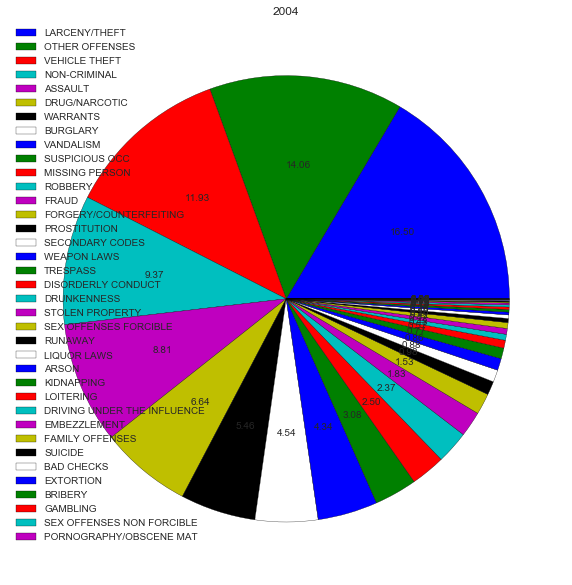

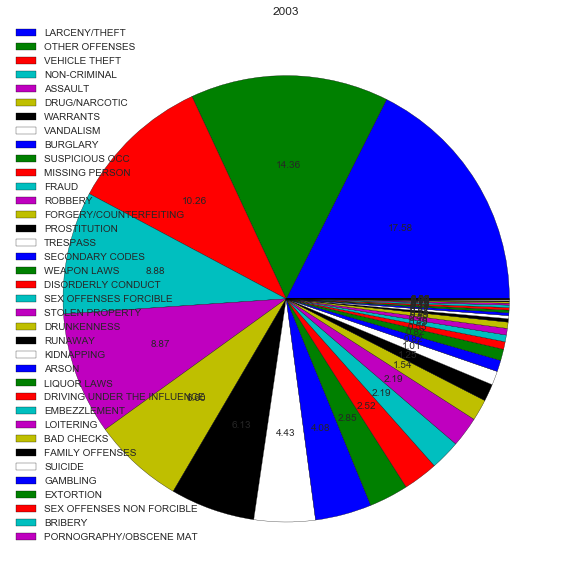

In [6]:
for year in tr_master.Years.unique():
    cats = tr_master.Category[tr_master.Years == year].value_counts()
    plt.figure(figsize=(10,10))
    plt.pie(cats, autopct='%.2f')
    plt.title(year)
    plt.legend(cats.index, loc='best')

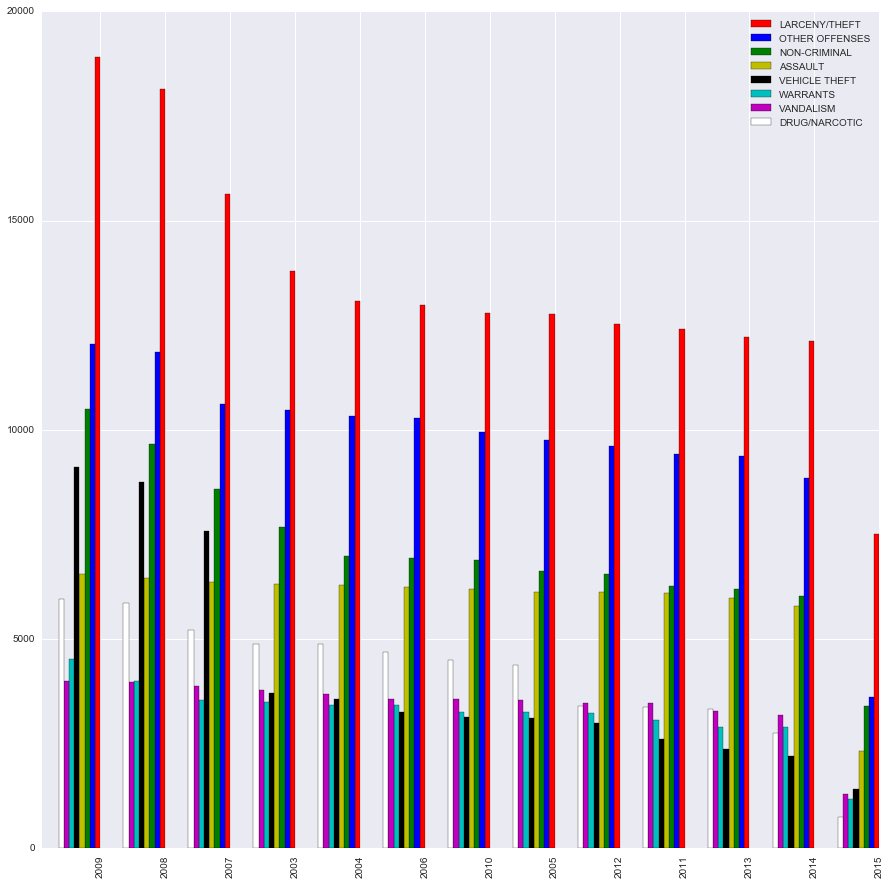

In [7]:
plt.figure(figsize=(15,15))
count = 0
top_crime = []
colors = ['r','b','g','y','k','c','m','w','r','b','g','y','k','c','m','w']
for year in tr_master.Years.unique():
    cats = tr_master.Category[tr_master.Years==year].value_counts()[0:5]
    for category in cats.index:
        if category not in top_crime:
            top_crime.append(category)

for crime in top_crime:
    tr_master.Years[tr_master.Category==crime].value_counts().plot(kind='bar', position=count+1, color=colors[count], width=0.08, align='center')
    count += 1

plt.legend(top_crime,loc='best')

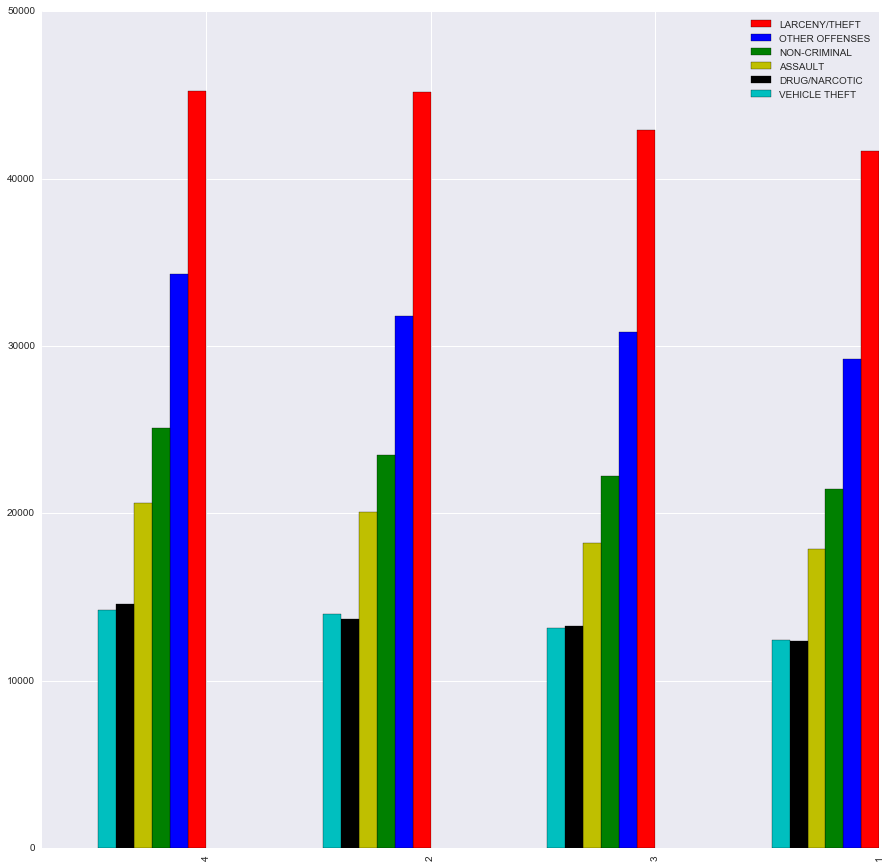

In [8]:
#taking a look at crime in each season
plt.figure(figsize=(15,15))
count = 0
top_crime = []
colors = ['r','b','g','y','k','c','m','w','r','b','g','y','k','c','m','w']
for season in tr_master.Season.unique():
    cats = tr_master.Category[tr_master.Season==season].value_counts()[0:5]
    for category in cats.index:
        if category not in top_crime:
            top_crime.append(category)

for crime in top_crime:
    tr_master.Season[tr_master.Category==crime].value_counts().plot(kind='bar', position=count+1, color=colors[count], width=0.08, align='center')
    count += 1

plt.legend(top_crime,loc='best')

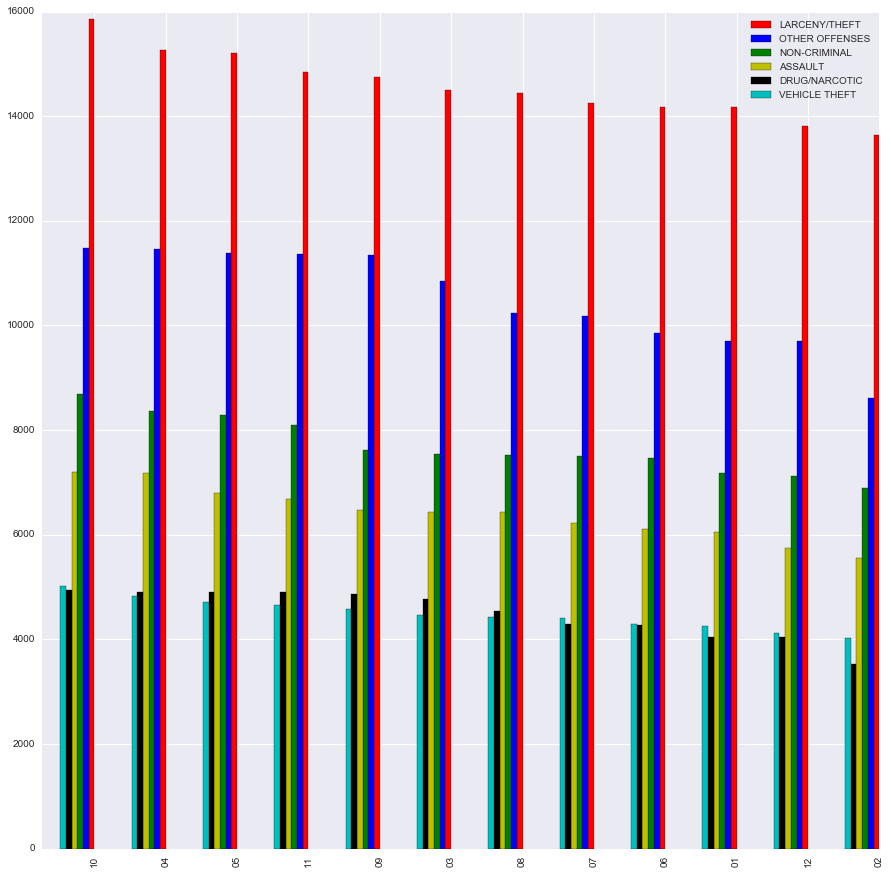

In [9]:
#taking a look at crime in each month
plt.figure(figsize=(15,15))
count = 0
top_crime = []
colors = ['r','b','g','y','k','c','m','w','r','b','g','y','k','c','m','w']
for month in tr_master.Month.unique():
    cats = tr_master.Category[tr_master.Month==month].value_counts()[0:5]
    for category in cats.index:
        if category not in top_crime:
            top_crime.append(category)

for crime in top_crime:
    tr_master.Month[tr_master.Category==crime].value_counts().plot(kind='bar', position=count+1, color=colors[count], width=0.08, align='center')
    count += 1

plt.legend(top_crime,loc='best')

In [10]:
#let's recode all the crimes into a few bins

#warrants - RESPONSE - 01
#suspicious occ, trespass, loitering, trea - LOCATION - 02
#other offenses, vandalism, weapon laws, secondary codes, arson - OTHER - 03
#larceny/theft, robbery, burglery, vehicle theft, stolen property, recovered vehicle - THEIVING - 04
#forgery/counterfeiting, fraud, bribery, embezzlement, extortion, bad checks - MONEY - 05
#drug/narcotic - DRUG - 06
#non-criminal, drunkeness, driving under the influence, disorderly conduct, liquor laws - DRINK - 07
#assault, suicide - VIOLENT - 08
#sex offenses forcible, prostitution, sex offenses non forcible, pornography/obscene mat- SEX - 09
#missing person, kidnapping, runaway - MISSING -10
#family offenses - FAMILY - 11
#gambling - GAMBLING - 12

# for crime in tr_master.Category.unique():
#     print crime
crime_recode = []
crime_dictionary = {'WARRANTS':1, 'SUSPICIOUS OCC':2, 'TRESPASS':2, 'LOITERING':2, 'TREA':2, 'OTHER OFFENSES':3, 
                    'VANDALISM':3, 'WEAPON LAWS':3, 'SECONDARY CODES':3, 'ARSON':3, 'LARCENY/THEFT':4, 'ROBBERY':4,
                   'BURGLARY':4, 'VEHICLE THEFT':4,'STOLEN PROPERTY':4,'RECOVERED VEHICLE':4, 'FORGERY/COUNTERFEITING':5,
                   'FRAUD':5,'BRIBERY':5,'EMBEZZLEMENT':5,'EXTORTION':5,'BAD CHECKS':5,'DRUG/NARCOTIC':6, 'NON-CRIMINAL':7,
                   'DRUNKENNESS':7, 'DRIVING UNDER THE INFLUENCE':7,'DISORDERLY CONDUCT':7,'LIQUOR LAWS':7, 'ASSAULT':8, 'SUICIDE':8,
                   'SEX OFFENSES FORCIBLE':9, 'PROSTITUTION':9, 'SEX OFFENSES NON FORCIBLE':9, 'PORNOGRAPHY/OBSCENE MAT':9,
                   'MISSING PERSON': 10, 'KIDNAPPING':10, 'RUNAWAY':10, 'FAMILY OFFENSES':11, 'GAMBLING':12}
for crime in tr_master.Category:
    crime_recode.append(crime_dictionary[crime])

tr_master['Cat_Recode'] = crime_recode    

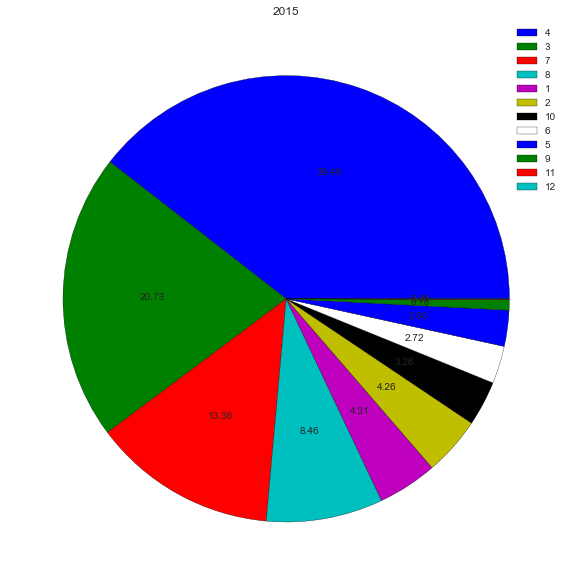

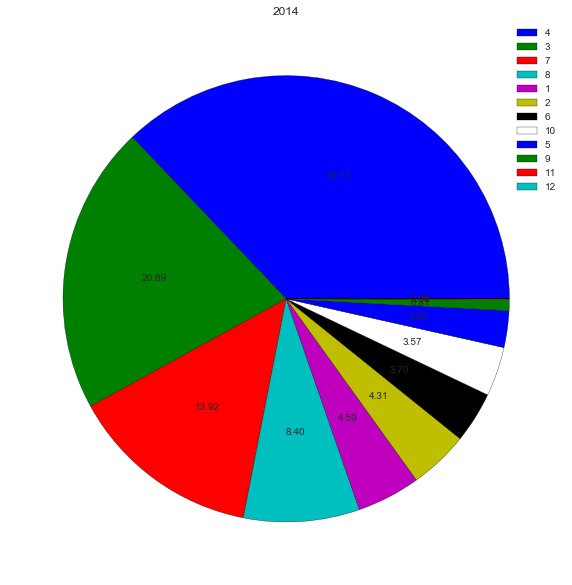

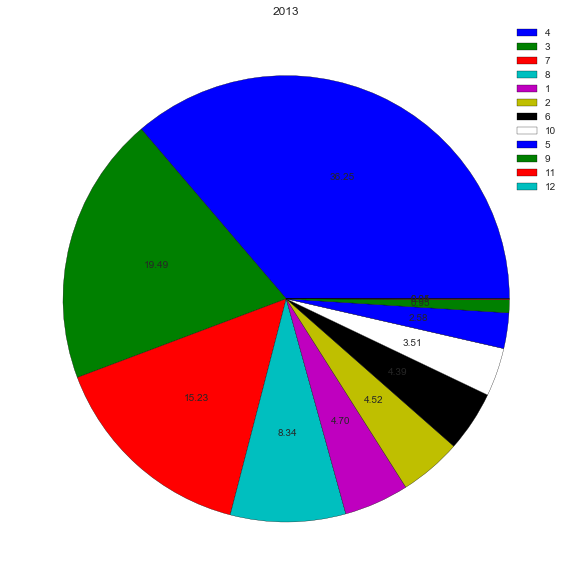

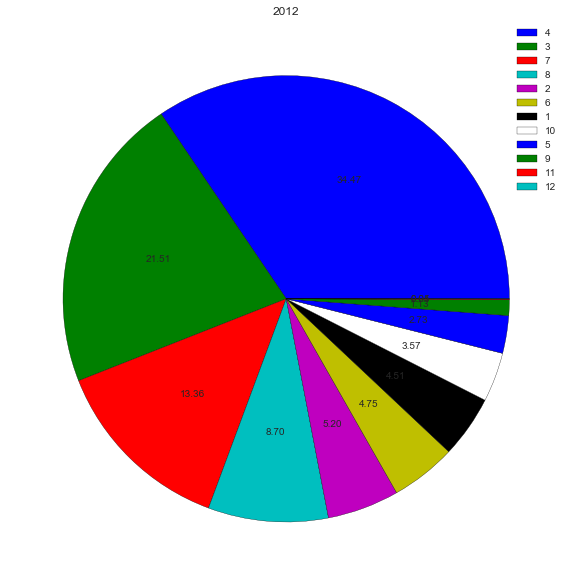

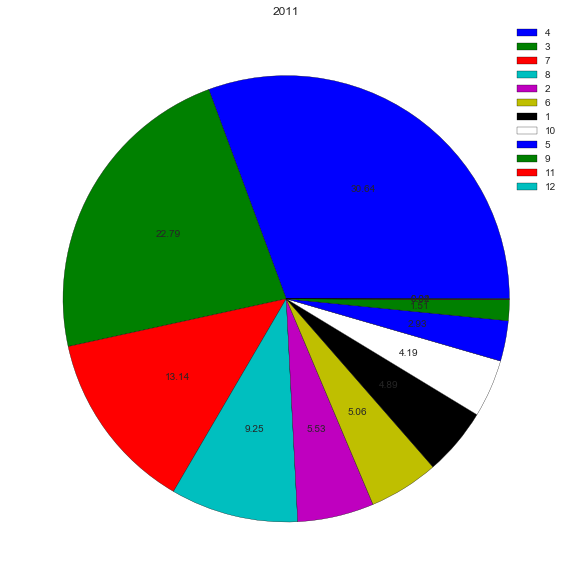

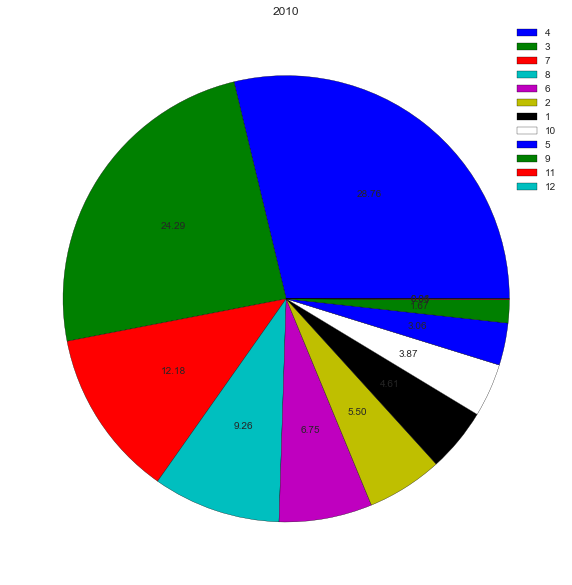

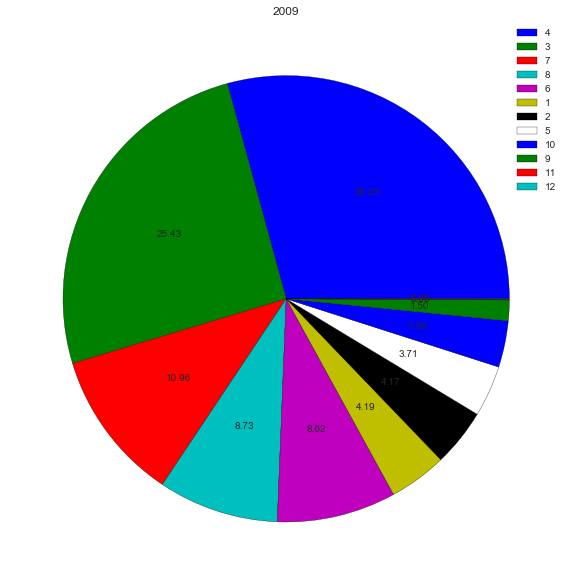

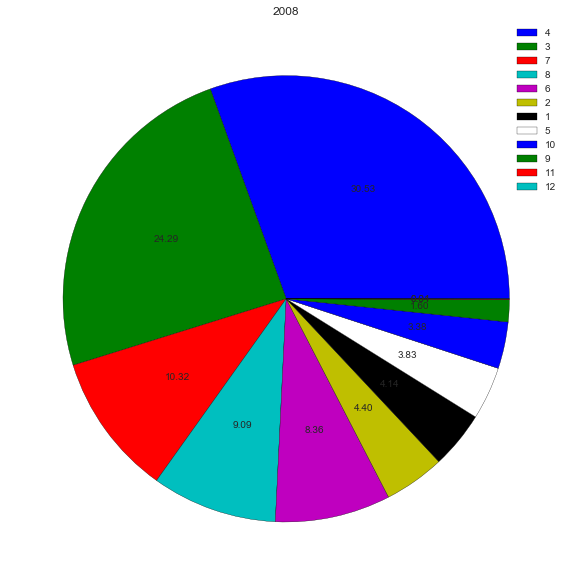

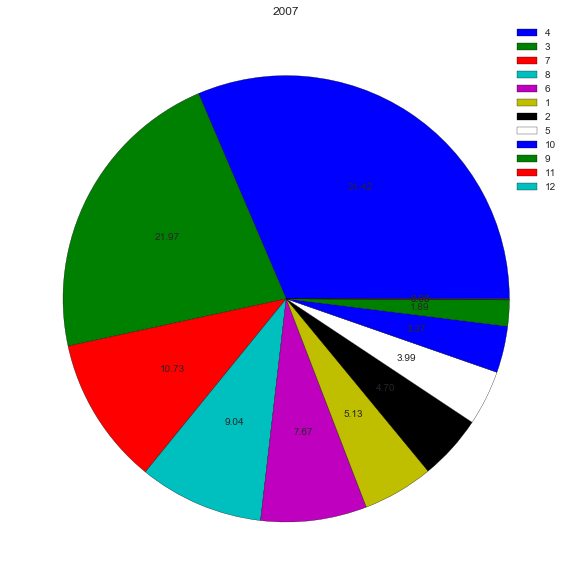

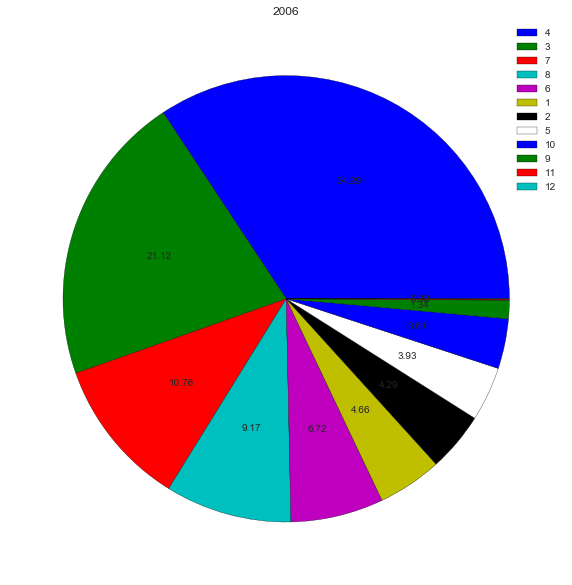

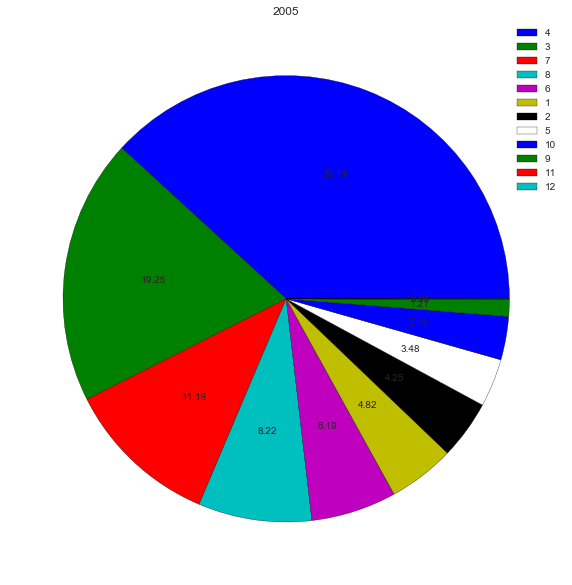

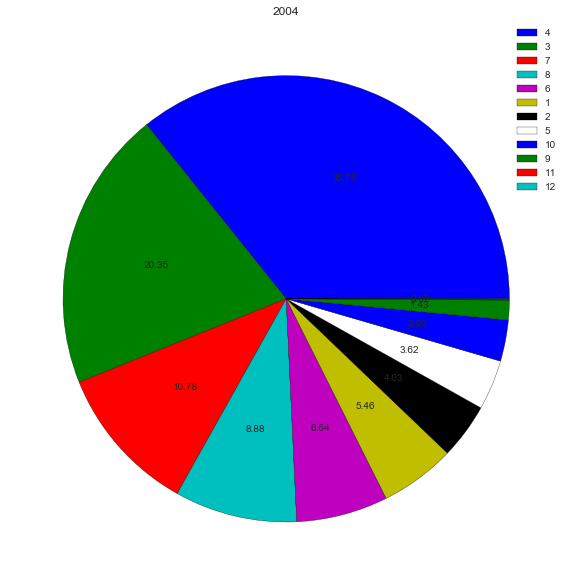

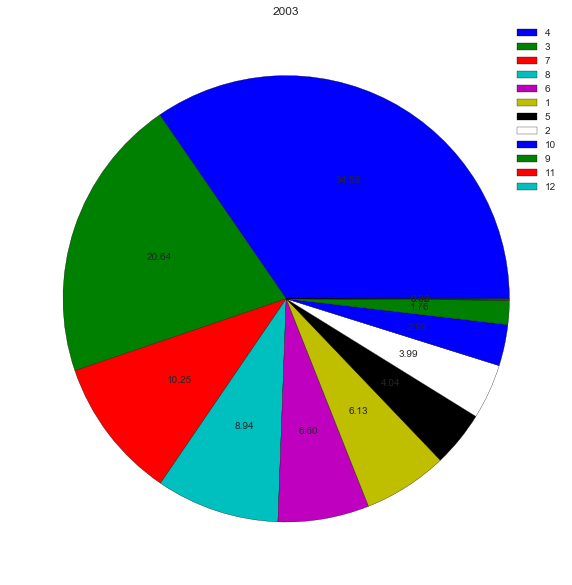

In [11]:
for year in tr_master.Years.unique():
    cats = tr_master.Cat_Recode[tr_master.Years == year].value_counts()
    plt.figure(figsize=(10,10))
    plt.pie(cats, autopct='%.2f')
    plt.title(year)
    plt.legend(cats.index, loc='best')

As for the spatial aspect, we attempt a mapping of different types of crime:

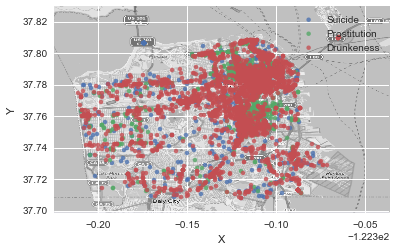

In [12]:
#probably want to generate either a "relative map" which is actually just
#a scatter plot from the X,Y data with color/size of dots related to type
#or amount of crime
plt.axis([-122.52469, -122.33663, 37.69862, 37.82986])
mapdata = np.loadtxt('sf_map_copyright_openstreetmap_contributors.txt')
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
ax = sns.regplot(tr_master[tr_master.Category == 'SUICIDE'].X, tr_master[tr_master.Category == 'SUICIDE'].Y, fit_reg=False)
ax = sns.regplot(tr_master[tr_master.Category == 'PROSTITUTION'].X, tr_master[tr_master.Category == 'PROSTITUTION'].Y, fit_reg=False)
ax = sns.regplot(tr_master[tr_master.Category == 'DRUNKENNESS'].X, tr_master[tr_master.Category == 'DRUNKENNESS'].Y, fit_reg=False)
ax.imshow(mapdata, cmap=plt.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)
plt.legend(['Suicide', 'Prostitution', 'Drunkeness'])

Last, we will look at a variety of factors in relation to each other:

In [13]:
#may want to look at season and type of crimes, whether or not a day
#is a holiday or weekend and the type of crime, relationship of type of crime 
#and location. May want to map where PDept districts are relative to the 
#crime they respond to...etc